AUG_0_3830.jpeg
AUG_0_3830.jpeg [16. 16. 16. 13. 20. 21. 13. 21. 10. 21.]
AUG_0_854.jpeg
AUG_0_854.jpeg [18. 43. 41. 32. 21. 23. 19. 40. 27. 14.]
AUG_0_6943.jpeg
AUG_0_6943.jpeg [13. 30. 20. 11. 21. 15. 15. 27. 29. 35.]
AUG_0_1980.jpeg
AUG_0_1980.jpeg [4. 3. 5. 3. 3. 1. 1. 1. 2. 1.]
AUG_0_2000.jpeg
AUG_0_2000.jpeg [1. 1. 2. 1. 1. 1. 1. 2. 2. 1.]
AUGmented_0_7447.jpeg
AUGmented_0_7447.jpeg [ 5. 12.  4. 12. 16.  6.  5.  9.  7.  8.]
AUG_0_2980.jpeg
AUG_0_2980.jpeg [10. 12.  7. 14.  6.  9.  5.  7.  6.  6.]
AUGmented_0_472.jpeg
AUGmented_0_472.jpeg [ 8. 10.  6.  5.  4.  4.  8.  4.  2.  4.]
AUG_0_5926.jpeg
AUG_0_5926.jpeg [1. 4. 3. 4. 4. 1. 1. 1. 4. 2.]
AUGmented_0_6981.jpeg
AUGmented_0_6981.jpeg [3. 2. 5. 2. 2. 1. 1. 1. 1. 1.]
AUG_0_4579.jpeg
AUG_0_4579.jpeg [3. 2. 1. 1. 2. 1. 1. 1. 1. 1.]
AUG_0_2624.jpeg
AUG_0_2624.jpeg [53. 27. 27. 27. 21. 28. 18. 30. 21. 33.]
AUG_0_7876.jpeg
AUG_0_7876.jpeg [ 5.  7. 10. 11.  3.  4.  6.  4.  8.  4.]
AUG_0_2018.jpeg
AUG_0_2018.jpeg [1. 3. 2. 2. 1. 1. 2. 1.

KeyboardInterrupt: 

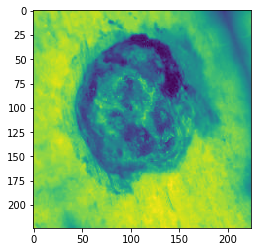

In [5]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn import metrics

PATH_MELANOMA = '../DermMel/test/Melanoma'
PATH_NOTMELANOMA = '../DermMel/test/NotMelanoma'
MELANOMA = "1"
NAO_MELANOMA = "2"

def distancia(a, b):
    M = len(a)
    soma = 0
    for i in range(M):
        soma = soma + ((a[i]-b[i])**2)
    return np.sqrt(soma) 

def extrair_caracteristica(img):
    plt.imshow(img)
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(img,None) # encontrando os pontos-de-interesse
    #print('Qtde Pontos Detectados: ', len(kp))
    # computando o vetor-de-característica para cada ponto dectado no passo anterior
    kp, des = sift.compute(img, kp)
    K = 2
    kmeans_model = KMeans(n_clusters=K).fit(des) #des são os vetores-de-características
    palavras = np.array(kmeans_model.cluster_centers_)
    pontos_rotulados = []

    for ponto in des:
        min = 9999
        label = -1
        for i in range(len(palavras)):
            dist = distancia(ponto, palavras[i])
            if(dist < min):
                min = dist
                label = i
        pontos_rotulados.append(label)

    hist = np.zeros(10)

    for i in pontos_rotulados:
        hist[i] += 1
    
    return hist

files_path = [os.path.abspath(x) for x in os.listdir(PATH_MELANOMA) if x.endswith('.jpeg' or '.jpg')]    
base_teste = []

#extraindo as características das imagens na base de dados
for i in files_path:
    diretorio, arquivo = os.path.split(i)
    imagem = cv2.imread(PATH_MELANOMA+'/'+arquivo, 0)
    carac = extrair_caracteristica(imagem)
    classe = MELANOMA
    print(arquivo, classe)
    base_teste.append((carac, classe)) 
    
files_path = [os.path.abspath(x) for x in os.listdir(PATH_NOTMELANOMA) if x.endswith('.jpeg' or )]      
for i in files_path:
    diretorio, arquivo = os.path.split(i)
    imagem = cv2.imread(PATH_NOTMELANOMA+'/'+arquivo,0)
    carac = extrair_caracteristica(imagem)
    classe = MELANOMA
    print(arquivo, classe)
    base_teste.append((carac, classe))
    
img = cv2.imread('2-1.png')
vetor_consulta = extrair_caracteristica(img)    
    